# 8.1 Итоговый тест

In [56]:
import scipy.stats as sps
import numpy as np
import pandas as pd

Чему равны выборочная медина, выборочное среднее и выборочная дисперсия?

In [30]:
X = np.array([128,107,107,92,118,114,117,109,115,106,109,106,109,120,112,128,114,119,110,130])
x = np.average(X)
D = sum(map(lambda y: (y - x)**2, X))/len(X)
np.mean(X), np.average(X), D

(113.5, 113.5, 76.75)

In [55]:
X = np.array([3, 0, 2, 1, 3, 2, 1, 0, 2, 1])
x = np.average(X)
D = sum(map(lambda y: (y - x)**2, X))/len(X)
x, D

(1.5, 1.05)

Правда ли, что в среднем скорость движения по КАД стала выше 110 км/ч?

In [76]:
X = np.array([128,107,107,92,118,114,117,109,115,106,109,106,109,120,112,128,114,119,110,130])
x = np.mean(X)
std = np.std(X,ddof=1)
n = len(X)
alpha = 0.03
Z = (x - 110) / (std / np.sqrt(n))
p = 1 - sps.t.cdf(Z, df=n-1)
print(p, f"H{int(p < alpha)}") 

0.04888812528612185 H0


По данным журнала Forbes  доходы топ 9 самых богатых людей мира 2016 на начало 2015 и 2016  годов были следующими

Верно ли то, что по сравнению с началом 2015 года  доходы уменьшились?
Воспользуйтесь критерием знаков для проверки данной гипотезы. 

In [81]:
a = np.array([79.2, 65.0, 72.7, 77.1, 34.8, 33.4, 54.3, 35.5, 42.9])
b = np.array([75, 67, 60.8, 50, 45.2, 44.6, 43.6, 40, 39.6])
n = len(a)
z = [int((a[i]-b[i]) < 0) for i in range(n)]
L = sum(z)
IL = 0
IR = int(sps.binom.ppf(0.05,n,0.5))
print('{}, {}, {}, {}'.format(L, IL, IR, 0 if L > IL and L < IR else 1))

4, 0, 2, 1


Курение считают основным фактором, предрасполагающим к хроническим заболеваниям легких. Что касается пассивного курения, оно таким фактором обычно не считается. Дж. Уайт и Г. Фреб усомнились в безвредности пассивного курения и исследовали проходимость дыхательных путей у некурящих, пассивных и активных курильщиков (J. White, H. Froeb. Small-airways dysfunction in nonsmokers chronically exposed to tobacco smoke. N. Engl. J. Med., 302:720—723, 1980). Для характеристики состояния дыхательных путей взяли один из показателей функции внешнего дыхания — максимальную объемную скорость середины выдоха, которую измеряли во время профилактического осмотра сотрудников Калифорнийского университета в Сан-Диего. Уменьшение этого показателя — признак нарушения проходимости дыхательных путей. Данные обследования представлены в таблице.

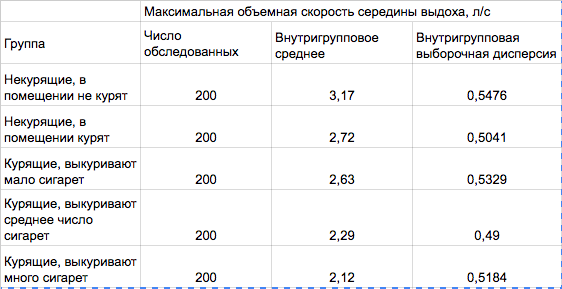

Можно ли считать максимальную объемную скорость середины выдоха одинаковой во всех группах?
Критерий: Однофакторный дисперсионный анализ

In [104]:
k = 5
alpha = 0.05
N = 1000
m = np.array([3.17, 2.72, 2.63, 2.29, 2.12])
d = np.array([0.5476, 0.5041, 0.5329, 0.49, 0.5184])
avm = m.sum()/5
std = d*200/199
stdd = sum([200*(m[i]-avm)**2 for i in range(5)])/N
Q1 = sps.chi2.ppf(1-alpha, N-k)*stdd
Q2 = sps.chi2.ppf(1-alpha, k-1)*stdd
Fb = Q2/(k-1)/(Q1/(N-k))

1.0

Исследуя проницаемость сосудов сетчатки, Дж. Фишман и соавт. (G. A. Fishman et al. Blood-retinal barrier function in patients with cone or cone-rod dystrophy. Arch. Ophthalmoi, 104:545—548, 1986) решили выяснить, связан ли этот показатель с электрической активностью сетчатки.

In [105]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [114]:
x = np.array([19.5, 15.0, 13.5, 23.3, 6.3, 2.5,13.0, 1.8,6.5,1.8]).reshape(-1, 1)
y = np.array([0.0, 38.5, 59.0, 97.4, 119.2, 129.5, 198.7, 248.7, 318.0, 438.5]).reshape(-1, 1)
n = len(x)
alpha = 0.05

In [115]:
linreg = LinearRegression()
linreg.fit(y=y, X=x)

LinearRegression()

In [116]:
beta0 = linreg.intercept_
beta1 = linreg.coef_[0]
beta0, beta1

(array([289.53761975]), array([-12.09182362]))

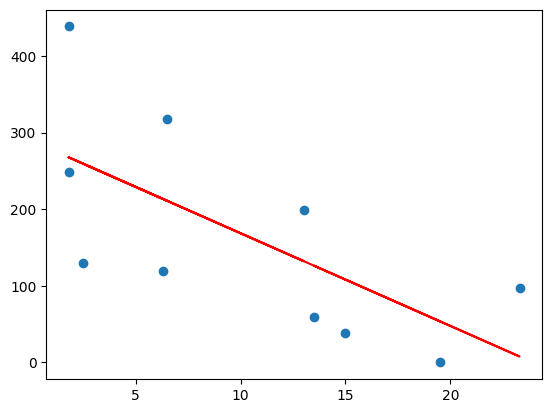

In [117]:
y_pred = linreg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()

In [118]:
rss = sum(map(lambda x: (x[0][0] - (beta0 + beta1*x[1][0]))**2, zip(y, x)))
S2 = rss/(n-2)
S2

array([11423.92354903])